In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# approval_polllist.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:/Users/USER-PC/Desktop/approval_polllist.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'approval_polllist.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 22 columns


In [8]:
df1.head(5)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,9/15/2020,1/20/2017,1/22/2017,Gallup,B,1500,a,0.262323,...,45.0,45.761970,43.587082,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,14:47:14 15 Sep 2020
1,Donald Trump,All polls,9/15/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992,rv,0.680029,...,37.0,45.329480,38.269692,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,14:47:14 15 Sep 2020
2,Donald Trump,All polls,9/15/2020,1/21/2017,1/23/2017,Gallup,B,1500,a,0.242845,...,46.0,45.761970,44.587082,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,14:47:14 15 Sep 2020
3,Donald Trump,All polls,9/15/2020,1/20/2017,1/24/2017,Ipsos,B-,1632,a,0.153481,...,45.2,43.214688,43.826230,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,14:47:14 15 Sep 2020
4,Donald Trump,All polls,9/15/2020,1/20/2017,1/25/2017,Quinnipiac University,B+,1190,rv,1.514172,...,44.0,37.649356,42.737554,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,14:47:14 15 Sep 2020


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_11708\964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\USER-PC\AppData\Local\Temp\ipykernel_11708\964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\USER-PC\AppData\Local\Temp\ipykernel_11708\964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


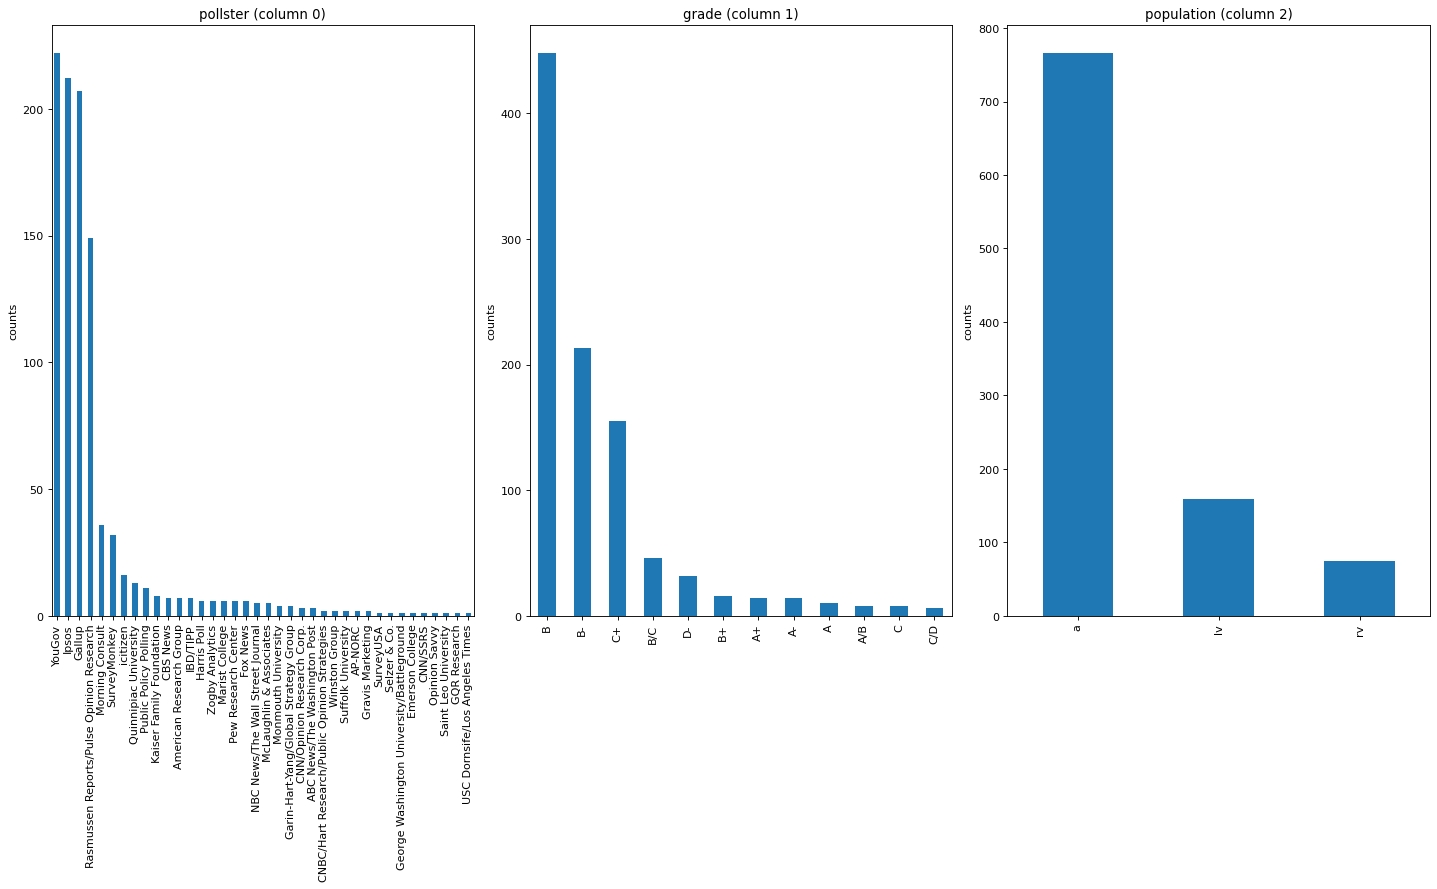

In [9]:
plotPerColumnDistribution(df1, 10, 5)

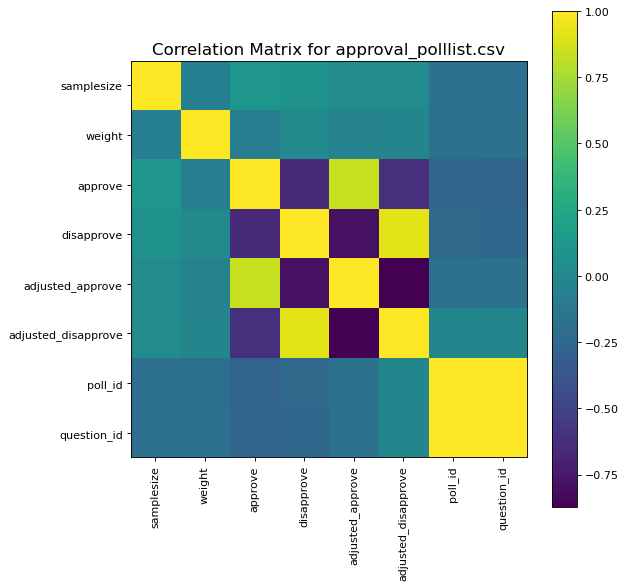

In [10]:
plotCorrelationMatrix(df1, 8)

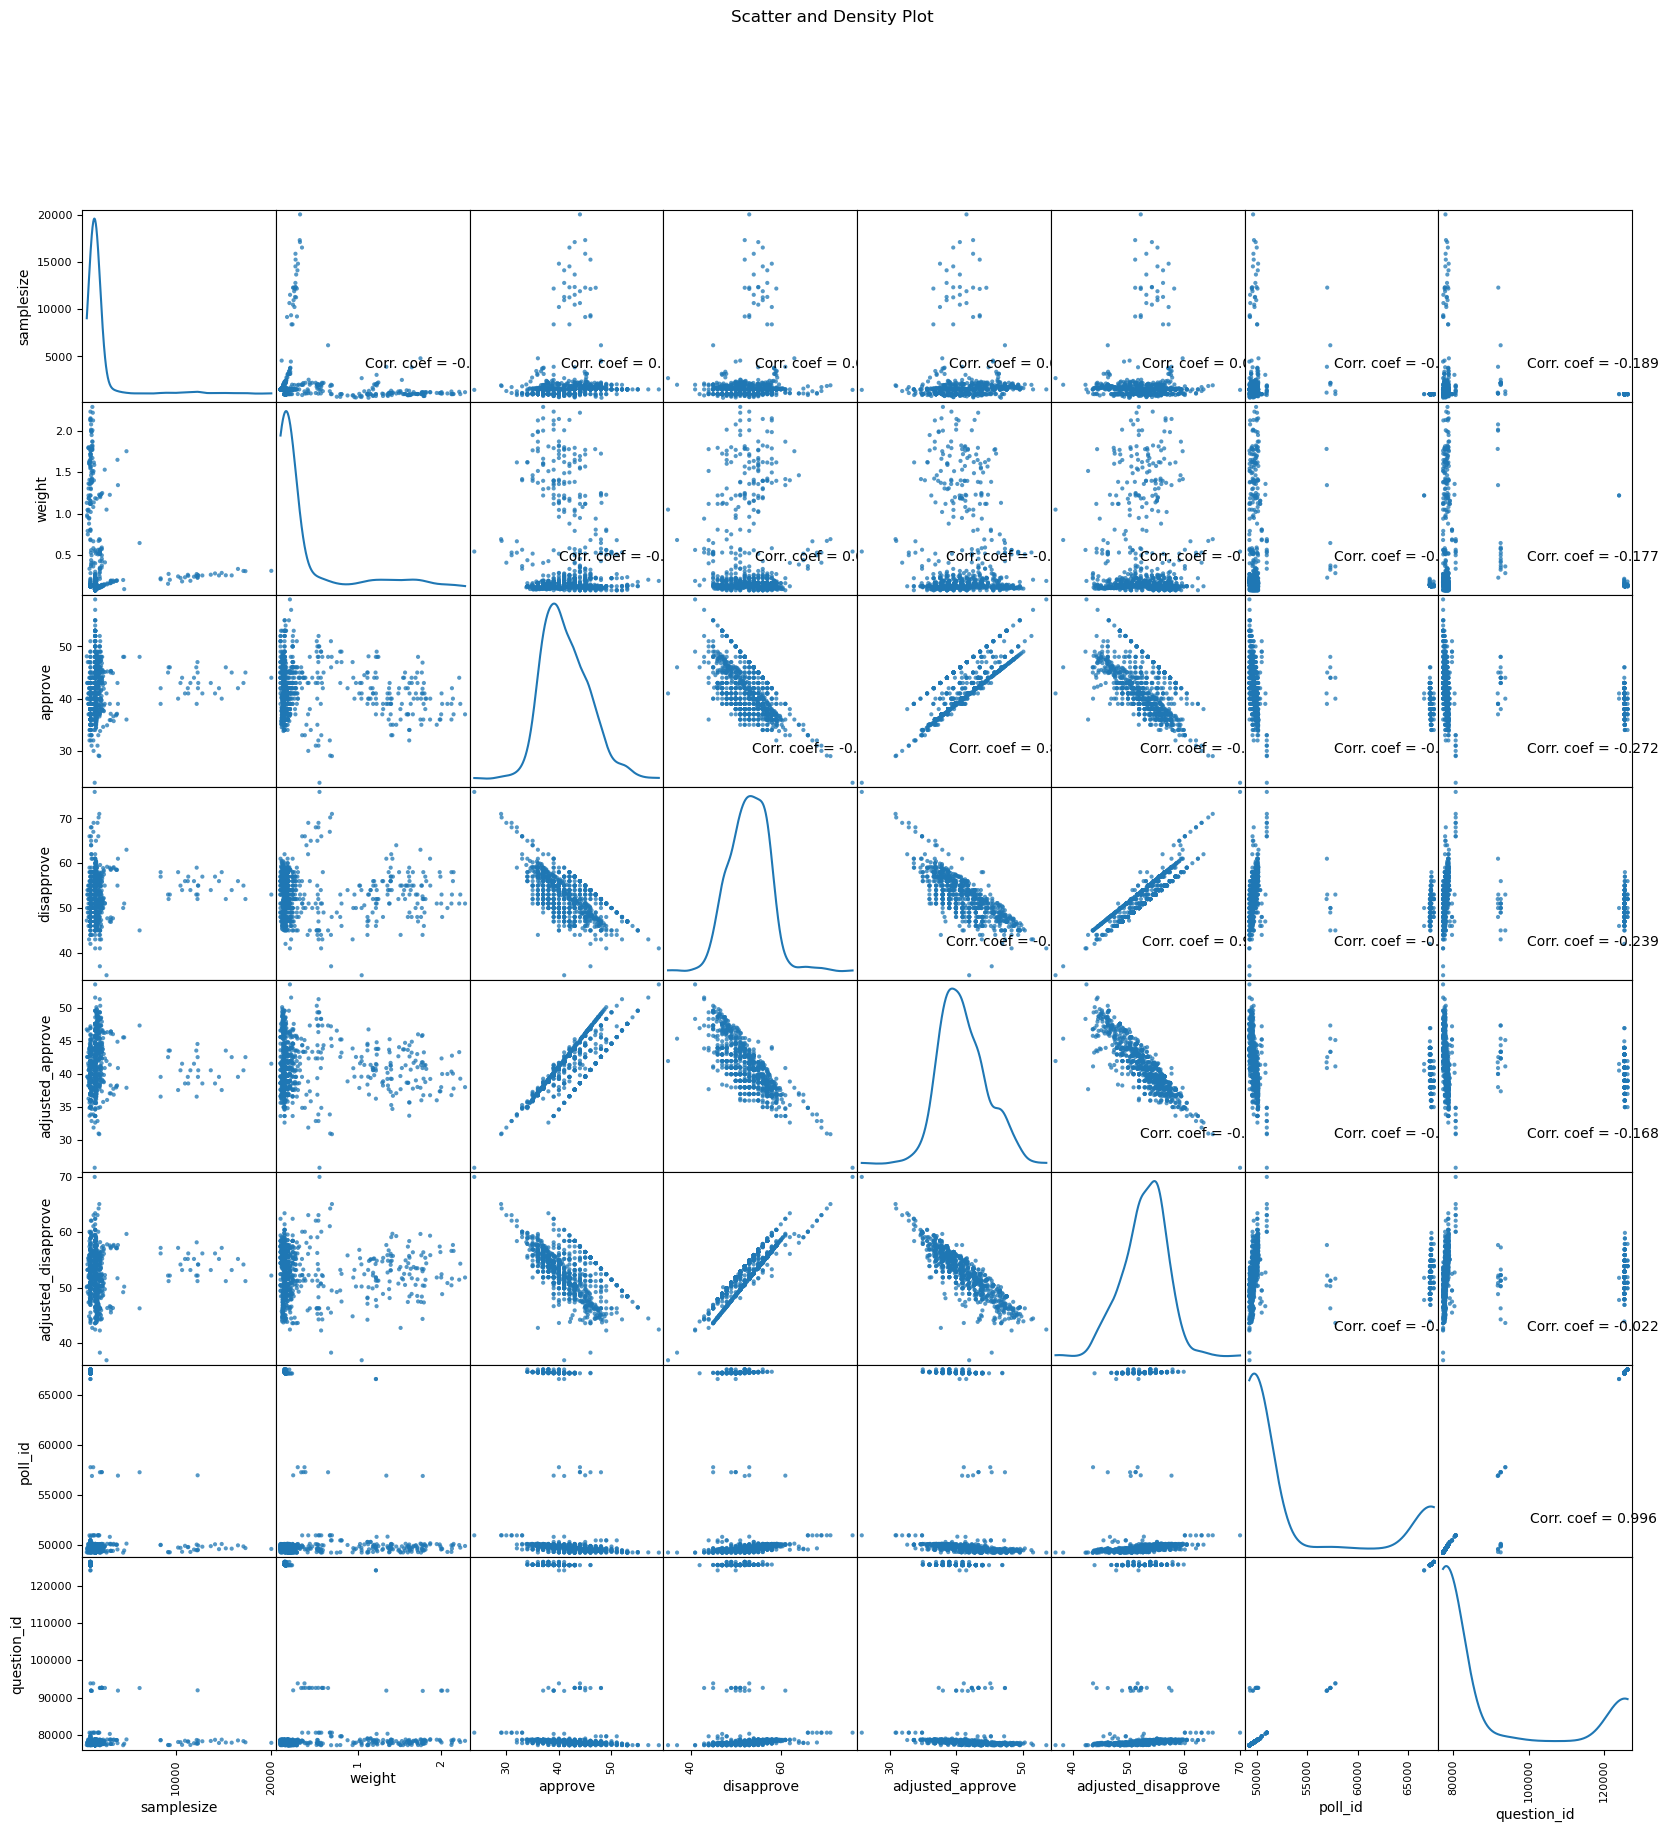

In [11]:
plotScatterMatrix(df1, 20, 10)